In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


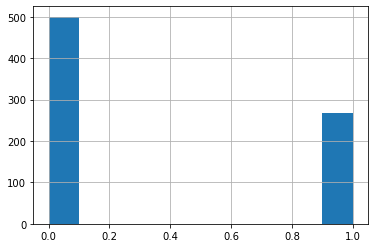

In [7]:
data.Outcome.hist()

In [3]:
data.shape

(768, 9)

In [11]:
x=data.iloc[:,:-1].values
x.shape
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [10]:
y=data.iloc[:,-1].values
y.shape

(768,)

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0,test_size=0.25)

In [14]:
print('xtrain is {}'.format(xtrain.shape))
print('xtest is {}'.format(xtest.shape))
print('ytrain is {}'.format(ytrain.shape))
print('ytest is {}'.format(ytest.shape))

xtrain is (576, 8)
xtest is (192, 8)
ytrain is (576,)
ytest is (192,)


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(xtrain)
X_test = sc.transform(xtest)

### logistic

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logr=LogisticRegression()

In [18]:
logt=logr.fit(X_train,ytrain)

In [19]:
ypred=logt.predict(X_test)
ypred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix

In [21]:
cm=confusion_matrix(ytest,ypred)
cm

array([[118,  12],
       [ 26,  36]], dtype=int64)

In [22]:
acc=accuracy_score(ytest,ypred)
acc

0.8020833333333334

### kernal svm

In [23]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, ytrain)

SVC(random_state=0)

In [24]:
ypred1=classifier.predict(X_test)
ypred1

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest, ypred1)
print(cm)
accuracy_score(ytest, ypred1)

[[117  13]
 [ 30  32]]


0.7760416666666666

### svm

In [26]:
from sklearn.svm import SVC
classifier1 = SVC(kernel = 'linear', random_state = 0)
classifier1.fit(X_train, ytrain)

SVC(kernel='linear', random_state=0)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier1.predict(X_test)
cm = confusion_matrix(ytest, y_pred)
print(cm)
accuracy_score(ytest, y_pred)

[[117  13]
 [ 25  37]]


0.8020833333333334

In [36]:
from sklearn.tree import DecisionTreeClassifier
classifier5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier5.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_preddc = classifier5.predict(xtest)
cm = confusion_matrix(ytest, y_preddc)
print(cm)
accuracy_score(ytest, y_preddc)

[[105  25]
 [ 18  44]]


0.7760416666666666

### random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 0)
classifier2.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=10, random_state=0)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred3 = classifier2.predict(xtest)
cm = confusion_matrix(ytest, y_pred3)
print(cm)
accuracy_score(ytest, y_pred3)

[[114  16]
 [ 28  34]]


0.7708333333333334

### navie bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(xtrain, ytrain)

GaussianNB()

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_prednb = classifier3.predict(xtest)
cm = confusion_matrix(ytest, y_prednb)
print(cm)
accuracy_score(ytest, y_prednb)

[[114  16]
 [ 29  33]]


0.765625

In [38]:
from xgboost import XGBClassifier
mod=XGBClassifier()
mod.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_predxg = mod.predict(xtest)
cm = confusion_matrix(ytest, y_predxg)
print(cm)
accuracy_score(ytest, y_predxg)

[[107  23]
 [ 23  39]]


0.7604166666666666

In [44]:
from sklearn.model_selection import cross_val_score

In [42]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)
print(kf.get_n_splits)

<bound method _BaseKFold.get_n_splits of KFold(n_splits=5, random_state=None, shuffle=False)>


In [45]:
model=cross_val_score(estimator=logt,X=X_train,y=ytrain,scoring='accuracy',n_jobs=-1,cv=kf)

In [49]:
acc=model.mean()*100
std=model.std()*100
print('accuracy',acc)
print('std',std)

accuracy 75.86656671664167
std 2.7830367891759287
